## Observations and Insights

## Dependencies and starter code

In [22]:
%matplotlib notebook

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

In [24]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [25]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [26]:
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


## Summary statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_by_drug = merged_data.groupby('Drug Regimen')
mean = grouped_by_drug['Tumor Volume (mm3)'].mean()
median = grouped_by_drug['Tumor Volume (mm3)'].median()
variance = grouped_by_drug['Tumor Volume (mm3)'].var()
std = grouped_by_drug['Tumor Volume (mm3)'].std()

summary_df = pd.DataFrame(mean)
summary_df.rename(columns={'Tumor Volume (mm3)':'Mean'}, inplace=True)
summary_df['Median'] = median
summary_df['Variance'] = variance
summary_df['Standard Deviation'] = std

summary_df

,Mean,Median,Variance,Standard Deviation
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.322552,50.854632,42.351070,6.507770
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


## Bar plots

<IPython.core.display.Javascript object>


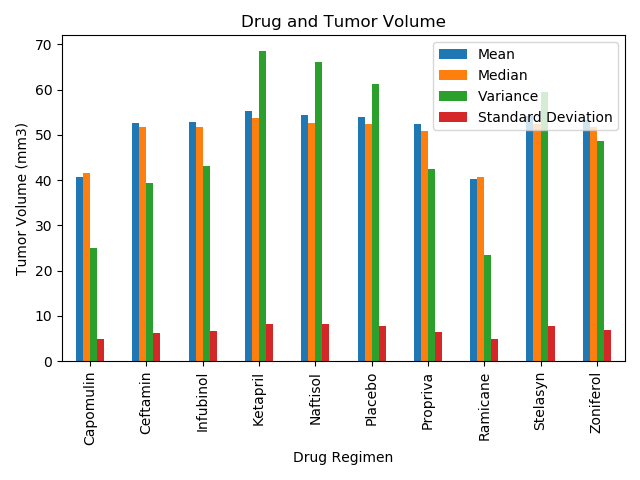

In [28]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
summary_chart = summary_df.plot( kind='bar', title="Drug and Tumor Volume")
summary_chart.set_ylabel("Tumor Volume (mm3)")
summary_chart.set_xlabel("Drug Regimen")

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


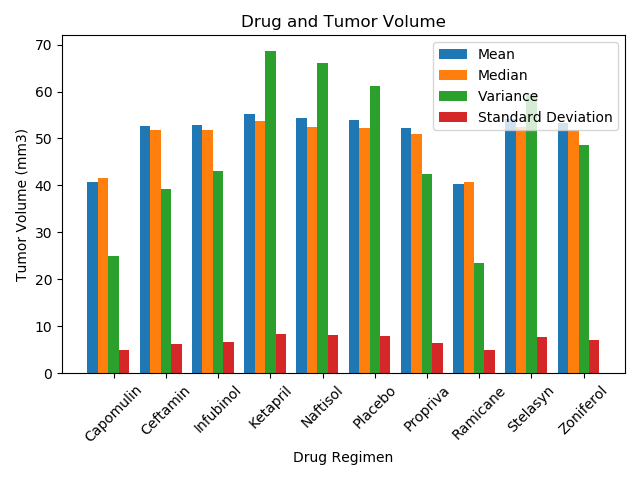

In [29]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x = np.arange(len(summary_df))
tick_locations = [value for value in x]
width = .2  # the width of each bar

fig, ax = plt.subplots()
rects1 = ax.bar(x - width * 2, summary_df['Mean'], width, label='Mean' )
rects2 = ax.bar(x - width, summary_df['Median'], width, label='Median' )
rects3 = ax.bar(x, summary_df['Variance'], width, label='Variance' )
rects4 = ax.bar(x + width,   summary_df['Standard Deviation'], width, label='Standard Deviation' )

ax.legend()

plt.xticks(tick_locations, summary_df.index, rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Drug and Tumor Volume")

fig.tight_layout()
fig.show()

## Pie plots

<IPython.core.display.Javascript object>


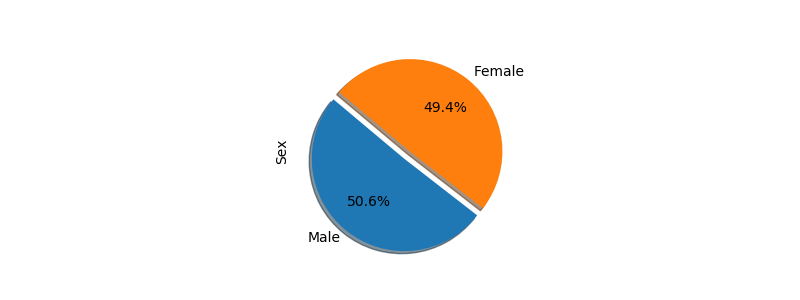

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# create a new plot so that it won't mess up previous plot
plt.figure(figsize=(8,3))

gender_count = merged_data['Sex'].value_counts()

# explode is a len(x) array which specifies the fraction of the radius with which to offset each wedge
explode = (0.1, 0)
gender_count.plot(kind = 'pie', explode = explode, shadow=True, startangle=140, autopct="%1.1f%%")


<IPython.core.display.Javascript object>


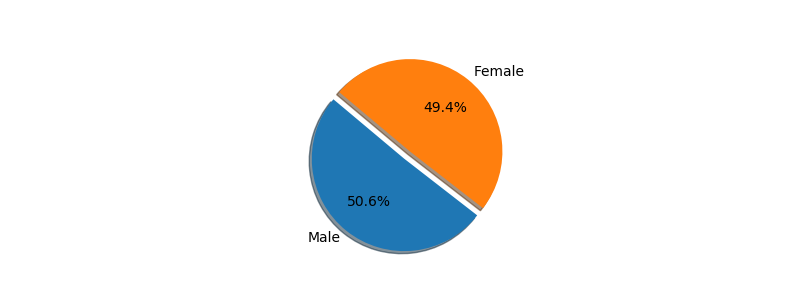

([<matplotlib.patches.Wedge at 0x2717e309f98>,
 [Text(-0.7536615388097399, -0.933806342299588, 'Male'),
  Text(0.690856410575595, 0.8559891471079556, 'Female')],
 [Text(-0.43963589763901484, -0.5447203663414263, '50.6%'),
  Text(0.3768307694048699, 0.46690317114979385, '49.4%')])

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(8,3))
plt.pie(gender_count.values, explode=explode, labels=gender_count.index, shadow=True, startangle=140, autopct="%1.1f%%")


## Quartiles, outliers and boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
# Question:  What is 'the final tumor volume'?

# sort summary data by 'Mean'
#summary_df.sort_values('Mean', inplace=True)
# get top 4 drugs
#top4_drugs = summary_df.index[0:4]

# the four most promissing treament regiments are given
top4_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

filtered_data = merged_data[merged_data['Drug Regimen'].isin(top4_drugs)]

# final tumor vlume is at Timepoint 45
filtered_data = filtered_data[filtered_data['Timepoint'] == 45]


# grouped_by_drug = filtered_data.groupby('Drug Regimen')

# mean = grouped_by_drug['Tumor Volume (mm3)'].mean()
# median = grouped_by_drug['Tumor Volume (mm3)'].median()
# variance = grouped_by_drug['Tumor Volume (mm3)'].var()
# std = grouped_by_drug['Tumor Volume (mm3)'].std()

# summary_df = pd.DataFrame(mean)
# summary_df.rename(columns={'Tumor Volume (mm3)':'Mean'}, inplace=True)
# summary_df['Median'] = median
# summary_df['Variance'] = variance
# summary_df['Standard Deviation'] = std

# summary_df

filtered_data.reset_index(inplace=True)
filtered_data.sort_values('Tumor Volume (mm3)',inplace=True)
final_tumor_volumes = filtered_data['Tumor Volume (mm3)']

quartiles = final_tumor_volumes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}") # 33.48
print(f"The upper quartile of tumor volume is: {upperq}") # 62.14
print(f"The interquartile range of tumor volume is: {iqr}") # 28.66
print(f"The the median of tumor volume is: {quartiles[0.5]} ") # 40.16

lower_bound = lowerq - (1.5*iqr) # 40.16
upper_bound = upperq + (1.5*iqr) # 105.13
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"Final tumor volumes are {final_tumor_volumes.values}")

min_volume = final_tumor_volumes.values.min()
max_volume = final_tumor_volumes.values.max()
print(f"Lowest voluem = {min_volume} and Highest volume = {max_volume}")

# min_volume = 22.05 and max_volume = 72.23  there are no outliers

The lower quartile of tumor volume is: 33.48002734
The upper quartile of tumor volume is: 62.14221369
The interquartile range of tumor volume is: 28.66218635
The the median of tumor volume is: 40.1592203 
Values below -9.513252184999999 could be outliers.
Values above 105.135493215 could be outliers.
Final tumor volumes are [22.05012627 23.34359787 28.43096411 28.48403281 29.12847181 30.27623175
 30.56462509 30.63869575 31.02392294 31.09533505 31.56046955 31.8962384
 32.37735684 32.97852192 33.32909778 33.39765251 33.56240217 34.45529799
 36.04104736 36.13485243 36.37451039 37.07402422 37.22565033 37.31123552
 37.31184577 38.1251644  38.4076183  38.81036633 38.84687569 38.93963263
 38.98287774 40.1592203  40.65812366 40.65900627 40.66771292 40.72857787
 41.48300765 41.58152074 43.0475426  45.22086888 47.68596303 59.74190064
 59.85195552 60.91876652 61.38666032 61.43389223 61.84902336 62.43540402
 62.75445141 62.99935619 64.29983003 64.63494887 64.72983655 65.52574285
 66.08306589 66.19

<IPython.core.display.Javascript object>


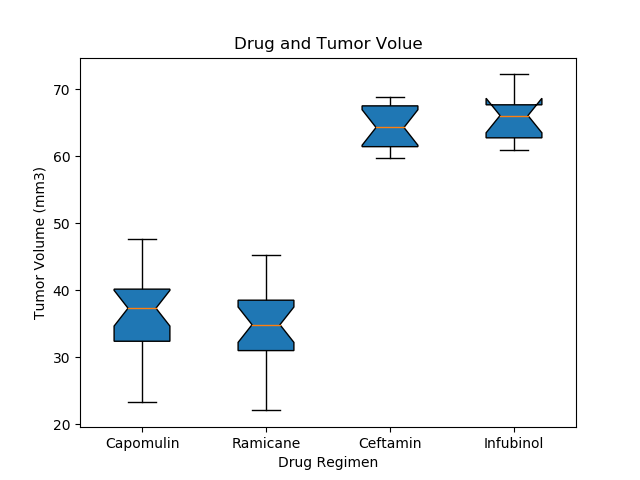

In [33]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capomulin = filtered_data[filtered_data['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane = filtered_data[filtered_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
ceftamin = filtered_data[filtered_data['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']
infubinol = filtered_data[filtered_data['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']

all_data = [capomulin, ramicane, ceftamin, infubinol]
labels = ['Capomulin', 'Ramicane', 'Ceftamin', 'Infubinol']
fig, ax1 = plt.subplots()
green_diamond = dict(markerfacecolor='g', marker='D')
bplot1 = ax1.boxplot(all_data, labels=labels, notch=True, patch_artist=True, vert=True, flierprops=green_diamond)
ax1.set_title("Drug and Tumor Volue")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Line and scatter plots

In [34]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

capomulin_data['Mouse ID'].unique()

array(['b128', 'j246', 'r554', 's185', 'b742', 'x401', 'l509', 's710',
       'r157', 'u364', 'j119', 'v923', 'w914', 'i738', 'r944', 'y793',
       'g316', 'g288', 'l897', 'w150', 't565', 'i557', 'm957', 'f966',
       'm601'], dtype=object)

<IPython.core.display.Javascript object>


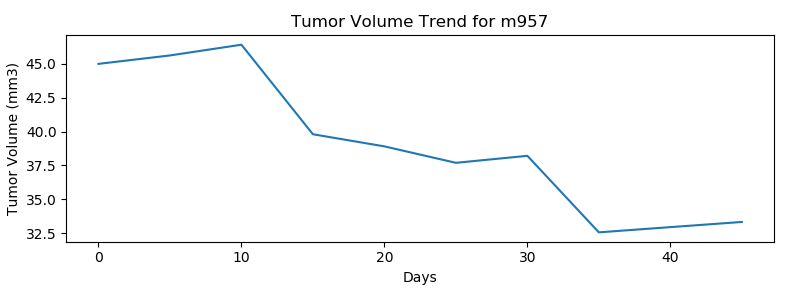

In [35]:
# pick a Mouse ID from above
mouse_id = 'm957'
x_axis = merged_data['Timepoint'].unique()
y_values = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]['Tumor Volume (mm3)']

plt.figure(figsize=(8,3))
plt.title(f"Tumor Volume Trend for {mouse_id}")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout()
plt.plot(x_axis,y_values)

<IPython.core.display.Javascript object>


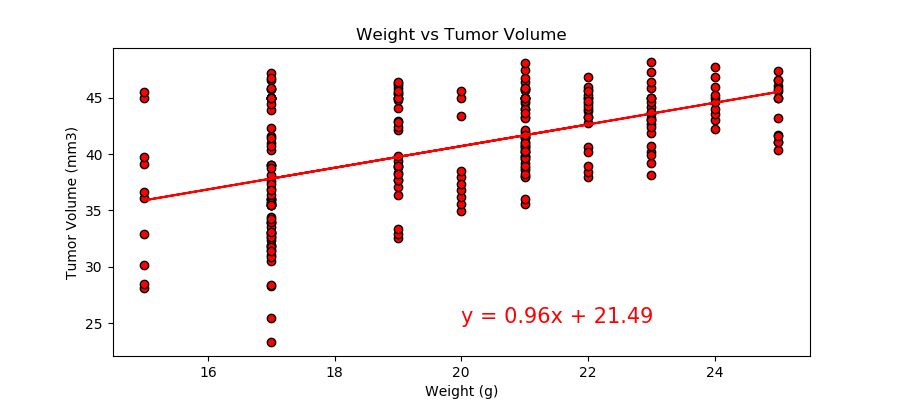

Text(0, 0.5, 'Tumor Volume (mm3)')

In [36]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Questions:  how to get average tumor volume?
weight_data = capomulin_data['Weight (g)']

tumor_volume_data = capomulin_data['Tumor Volume (mm3)']

plt.figure(figsize=(9,4))
plt.scatter(weight_data,tumor_volume_data, marker= 'o', facecolor='red', edgecolors='black')
plt.title("Weight vs Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")



In [37]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(weight_data, tumor_volume_data)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_data, tumor_volume_data)
regress_values = weight_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weight_data,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()



The correlation between both factors is 0.53
The r-squared is: 0.5256995552077169
